In [1597]:
#Q1
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt;
data = pd.read_csv('../Titanic/train.csv')

null_features_counts = list(filter(lambda x: next(iter(x.values())), 
                                    map(lambda f: {f: len(data.loc[data[f].isnull()])}, data.columns)))
print(str(null_features_counts))

#From HW1, I decided to drop the cabin feature since it had too many null values. I am dropping PassengerId and Name as well since they are meaningless for the training
#For more info check Q15 of: https://github.com/lumalav/CAP5610/blob/master/HW1/HW1.ipynb
for x in ['Cabin', 'PassengerId', 'Name']:
    data = data.drop(x, 1)

[{'Age': 177}, {'Cabin': 687}, {'Embarked': 2}]


In [1598]:

#Q1 Continuation
#converting Sex feature into numerical values 
#For more info check Q16 of: https://github.com/lumalav/CAP5610/blob/master/HW1/HW1.ipynb
data = data.replace({'Sex': 'male'}, {'Sex': 0})
data = data.replace({'Sex': 'female'}, {'Sex': 1})

print(data['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [1599]:
#Q1 Continuation
#Since there are 177 missing values for the Age feature, I will fill these values with random numbers between mean and the std of the entire set
#For more info check Q17 of: https://github.com/lumalav/CAP5610/blob/master/HW1/HW1.ipynb
std = data['Age'].std()
mean = data['Age'].mean()
data['Age'] = data['Age'].apply(lambda x: np.random.uniform(mean, std, 1)[0] if np.isnan(x) else x)

In [1600]:
#Q1 Continuation
#Since there are two missing values for the Embarked feature, I will fill these values with the most common occurrence from the entire set
#For more info check Q18 of: https://github.com/lumalav/CAP5610/blob/master/HW1/HW1.ipynb
embarked = data.pivot_table(index=['Embarked'], aggfunc ='size').to_frame().sort_values([0], ascending=False).iloc[0]

print('Most common port of embarkation: ' + embarked.name + ', with: ' + str(embarked.values[0]) + ' occurrences')
data['Embarked'] = data['Embarked'].apply(lambda x: embarked.name if pd.isnull(x) else x)

Most common port of embarkation: S, with: 644 occurrences


In [1601]:
#Q1 Continuation
#To improve performance, continuous data like Fare and Age will be set into buckets
#For more info check Q20 of: https://github.com/lumalav/CAP5610/blob/master/HW1/HW1.ipynb
data['Fare'] = pd.cut(data['Fare'], bins=[-0.001,7.91,14.4542,31.0,512.3292], labels=[1,2,3,4])
data['Age'] = pd.cut(data['Age'], bins=[0,15,25,50,75,80], labels=[1,2,3,4,5])

Sex 0: male
Sex 1: female
Age 1: 0-15
Age 2: 15-25
Age 3: 25-50
Age 4: 50-75
Age 5: 75-80


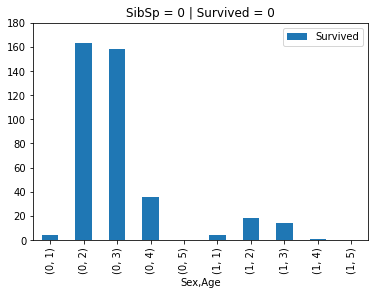

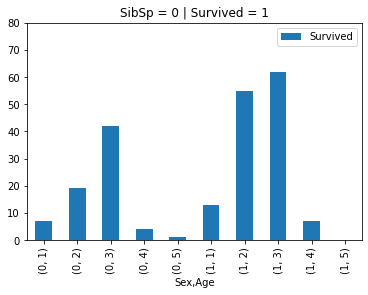

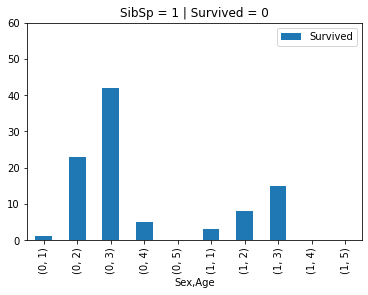

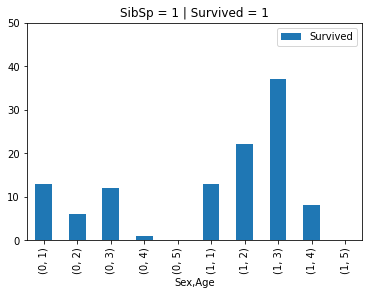

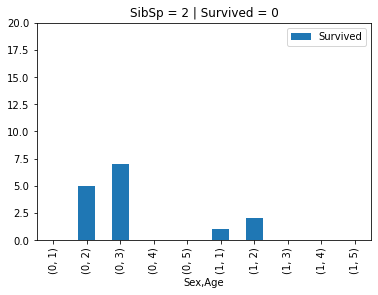

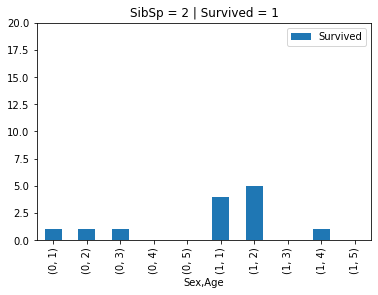

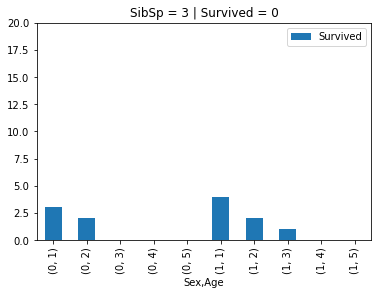

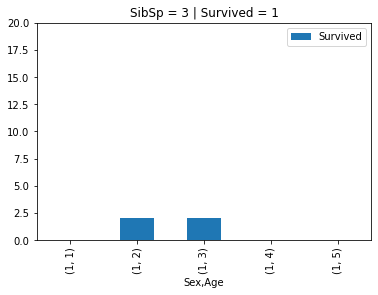

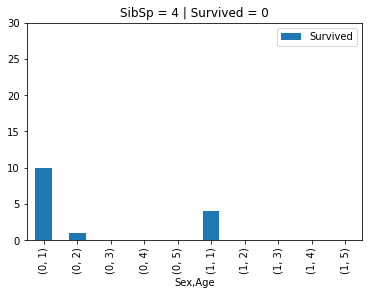

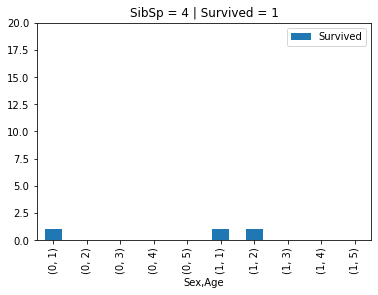

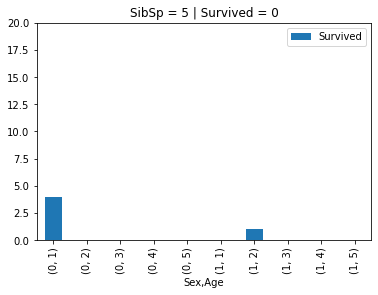

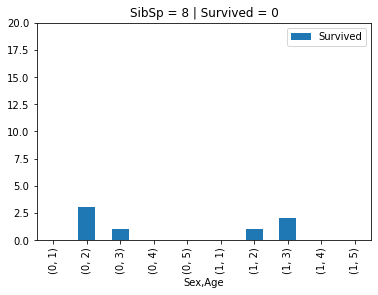

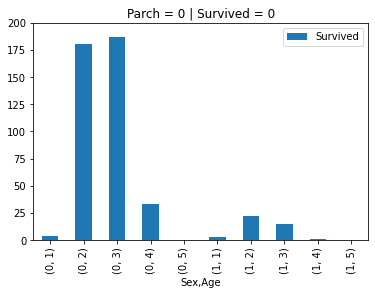

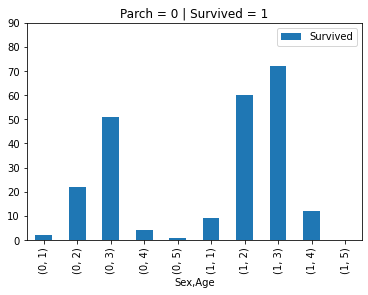

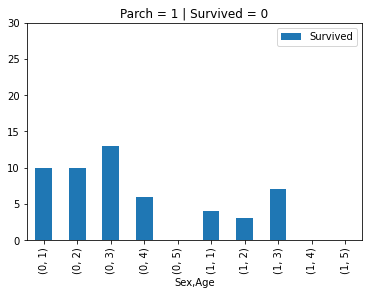

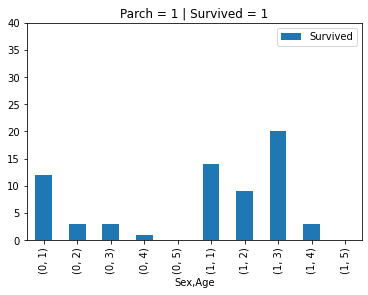

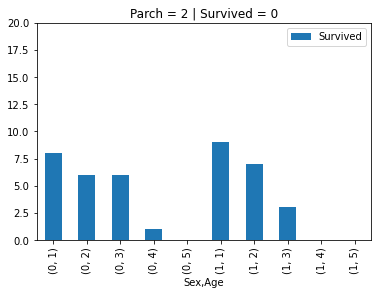

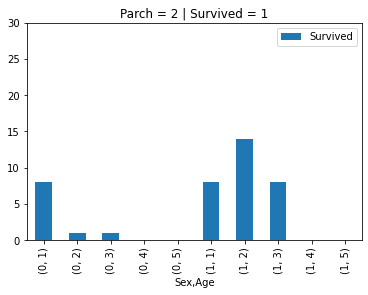

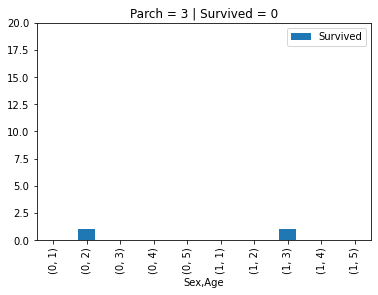

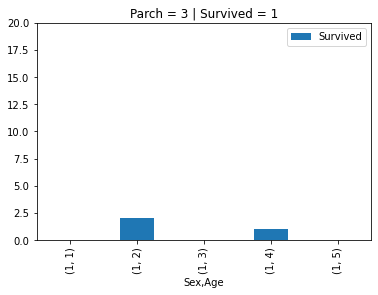

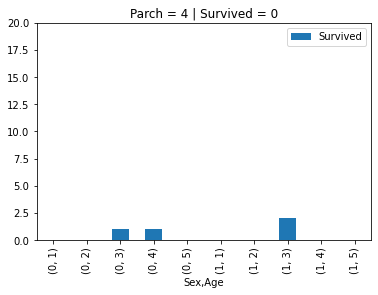

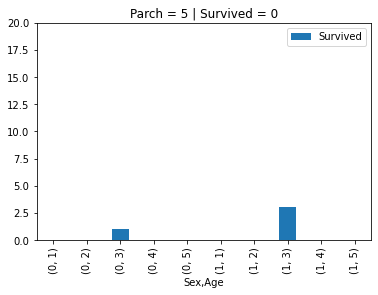

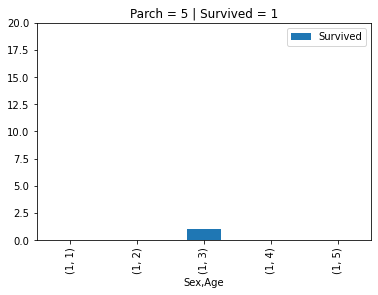

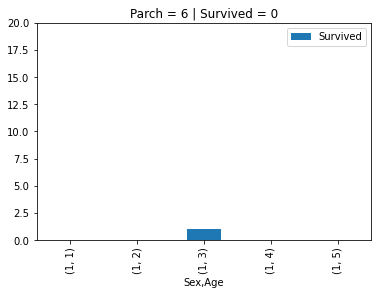

In [1602]:
#Q2
#From HW1 we showed strong correlation between Survived-Age, Survived-Sex, Survived-Pclass, Survived-Embarked, and Survived-Ticket
#Regarding the SibSp and Parch features, these might be more useful if they were splitted into four columns:
#Siblings, Spouse, Parents, Children. Because even though we can display some nice charts when grouping by Age, Survived and Sex. For older people is difficult to see
#if they have their parents with them or their children or both at the same time. Likewise, the same problem occurs with the number of siblings and spouse. We are not really sure which is which so I'll be dropping these features as well
q2 = data
for x in ['Fare', 'Embarked', 'Pclass', 'Ticket']:
    q2 = q2.drop(x, 1)
for x in ['SibSp', 'Parch']:
    for g, group in q2.groupby([x, 'Survived']):
        result = group.drop('SibSp', 1).drop('Parch', 1).groupby(['Sex', 'Age']).count()
        yl = result['Survived'].max() + (20 - result['Survived'].max()%10)
        result.plot(kind='bar', title= x + ' = ' + str(g[0]) + ' | ' + 'Survived = ' + str(g[1]), ylim=(0,yl));
for x in ['SibSp', 'Parch', 'Pclass']:
    data = data.drop(x, 1)
print('Sex 0: male\nSex 1: female\nAge 1: 0-15\nAge 2: 15-25\nAge 3: 25-50\nAge 4: 50-75\nAge 5: 75-80')



{0: '110152', 1: '110413', 2: '110465', 3: '110564', 4: '110813', 5: '111240', 6: '111320', 7: '111361', 8: '111369', 9: '111426', 10: '111427', 11: '111428', 12: '112050', 13: '112052', 14: '112053', 15: '112058', 16: '112059', 17: '112277', 18: '112379', 19: '113028', 20: '113043', 21: '113050', 22: '113051', 23: '113055', 24: '113056', 25: '113059', 26: '113501', 27: '113503', 28: '113505', 29: '113509', 30: '113510', 31: '113514', 32: '113572', 33: '113760', 34: '113767', 35: '113773', 36: '113776', 37: '113781', 38: '113783', 39: '113784', 40: '113786', 41: '113787', 42: '113788', 43: '113789', 44: '113792', 45: '113794', 46: '113796', 47: '113798', 48: '113800', 49: '113803', 50: '113804', 51: '113806', 52: '113807', 53: '11668', 54: '11751', 55: '11752', 56: '11753', 57: '11755', 58: '11765', 59: '11767', 60: '11769', 61: '11771', 62: '11774', 63: '11813', 64: '11967', 65: '12233', 66: '12460', 67: '12749', 68: '13049', 69: '13213', 70: '13214', 71: '13502', 72: '13507', 73: '13

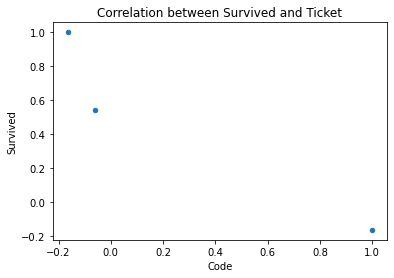

In [1603]:
#Q2 Continuation
data = data.replace({'Sex': 'male'}, {'Sex': 0})
data = data.replace({'Sex': 'female'}, {'Sex': 1})
data['Code']=data['Ticket'].astype('category').cat.codes
#here we print the categorical dictionary assigned to every ticket. It seems there is a higher chance of survival on lower categorical values
print(dict(enumerate(data['Ticket'].astype('category').cat.categories)))
data.corr().plot.scatter(x='Code',y='Survived', title='Correlation between Survived and Ticket');
data = data.drop('Code', 1)

In [1604]:
print(data.head())

Survived  Sex Age            Ticket Fare Embarked
0         0    0   2         A/5 21171    1        S
1         1    1   3          PC 17599    4        C
2         1    1   3  STON/O2. 3101282    2        S
3         1    1   3            113803    4        S
4         0    0   3            373450    2        S
